In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [2]:
data = pd.read_csv('datasets/dengue-dataset.csv')
df = pd.DataFrame(data=data)
df.head(12)

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9
5,1998-06-01,11,21.2,18.0,15.4,21.2
6,1998-07-01,6,7.9,19.0,13.5,22.9
7,1998-08-01,4,15.6,21.7,17.0,25.7
8,1998-09-01,7,88.1,21.9,18.9,26.1
9,1998-10-01,7,167.3,21.9,18.4,24.6


In [3]:
df.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.000000,196.000000,204.000000,204.000000,204.000000
mean,357.539216,116.650000,22.200980,17.679412,25.565196
std,1741.814759,96.631613,2.399363,3.336316,2.249864
min,0.000000,0.800000,16.400000,8.200000,19.100000
25%,6.000000,43.850000,20.100000,15.075000,23.800000
50%,17.500000,86.650000,22.700000,18.150000,26.200000
75%,84.500000,177.925000,24.225000,20.400000,27.200000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 196 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB


In [5]:
df.isnull().sum()

data                    0
casos-confirmados       0
chuva                   8
temperatura-media       0
temperatura-mininima    0
temperatura-maxima      0
dtype: int64

In [6]:
df.rename(columns={'casos-confirmados':'casos_confirmados','temperatura-media':'temperatura_media','temperatura-mininima':'temperatura_minima','temperatura-maxima':'temperatura_maxima'},inplace = True)

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

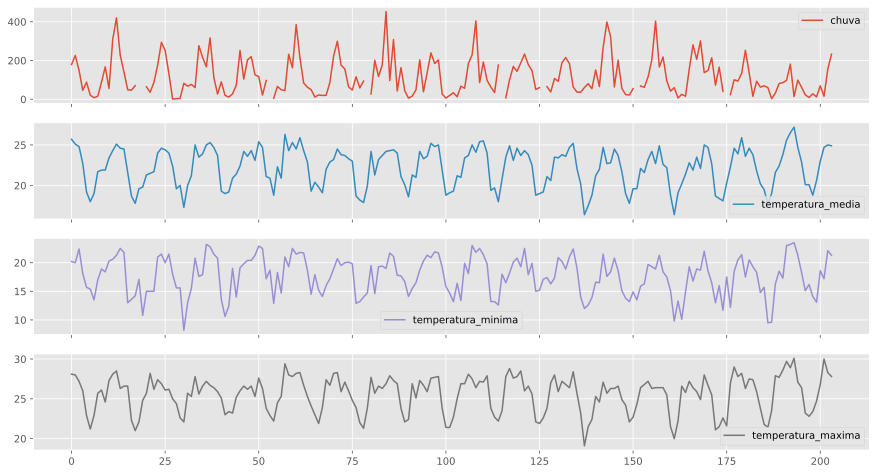

In [7]:
df.drop(columns=['casos_confirmados','data']).plot(subplots=True, figsize=(15,8))

In [8]:
df_filtrado = df[df["data"] > "2011-01-01"]

C:\Users\dev\AppData\Local\Temp\ipykernel_5472\2186624668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.data = pd.to_datetime(df_filtrado.data)


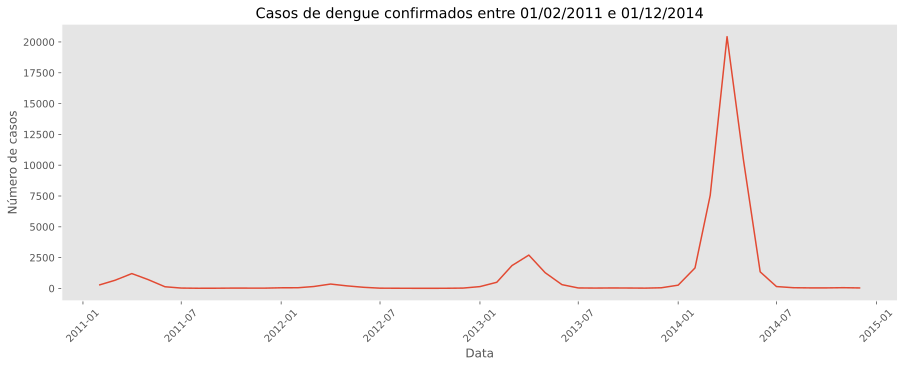

In [9]:
#Isolando casos
df_filtrado.data = pd.to_datetime(df_filtrado.data)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(df_filtrado['data'],df_filtrado['casos_confirmados'])
plt.xlabel('Data')
plt.ylabel('Número de casos')
plt.title('Casos de dengue confirmados entre 01/02/2011 e 01/12/2014')
plt.grid()

In [10]:
df_filtrado.set_index('data', inplace = True)

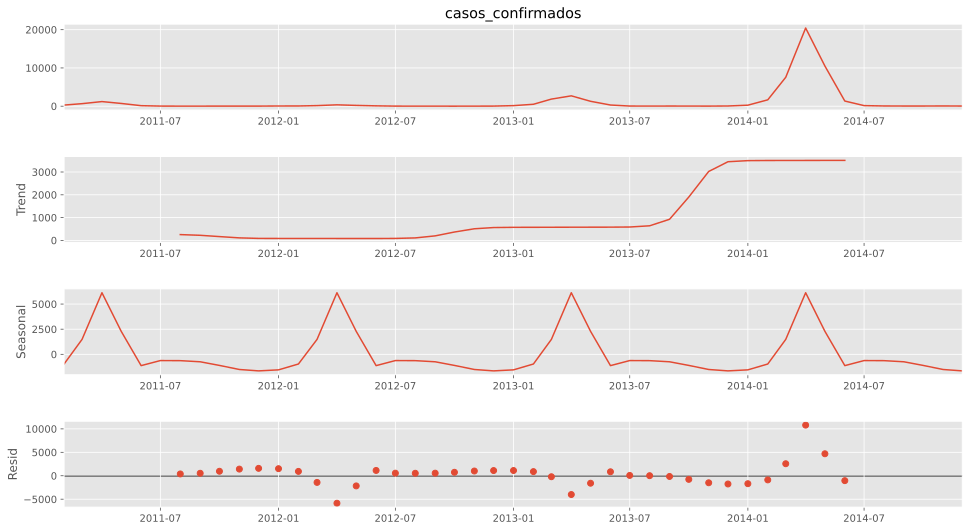

In [11]:
result = seasonal_decompose(df_filtrado.casos_confirmados,period=12)
fig = result.plot()
fig.set_size_inches(15, 8)
plt.show()

In [12]:
#df_filtrado.casos_confirmados.rolling(12).mean().plot(figsize=(16,6))

Text(0, 0.5, 'Casos Confirmados')

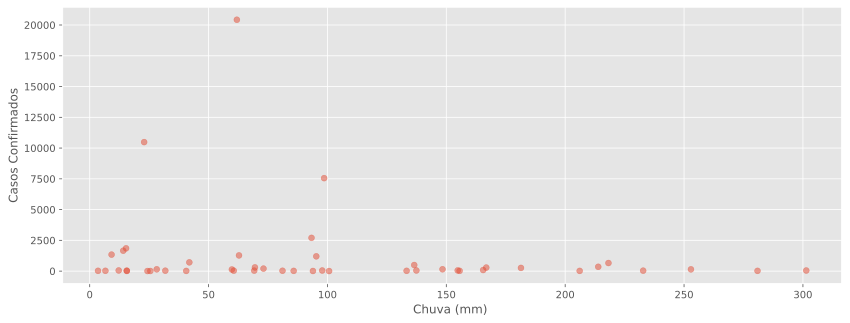

In [13]:
plt.figure(figsize = (14,5))
plt.scatter(df_filtrado.chuva,df_filtrado.casos_confirmados,alpha=0.5)
plt.xlabel("Chuva (mm) ")
plt.ylabel('Casos Confirmados')

Text(0, 0.5, 'Casos Confirmados')

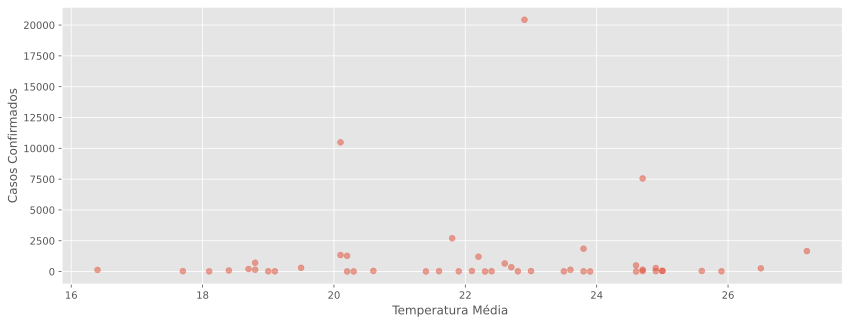

In [14]:
plt.figure(figsize = (14,5))
plt.scatter(df_filtrado.temperatura_media,df_filtrado.casos_confirmados,alpha=0.5)
plt.xlabel("Temperatura Média ")
plt.ylabel('Casos Confirmados')

In [15]:
df_filtrado

,casos_confirmados,chuva,temperatura_media,temperatura_minima,temperatura_maxima
data,,,,,
2011-02-01,288,166.8,24.9,21.3,26.4
2011-03-01,658,218.2,22.6,18.4,26.4
2011-04-01,1202,95.3,22.2,17.5,25.5
2011-05-01,714,41.9,18.8,15.1,21.5
2011-06-01,133,59.8,16.4,9.8,20.0
2011-07-01,26,6.6,19.1,13.3,22.2
2011-08-01,11,25.5,20.2,10.1,26.6
2011-09-01,13,15.6,21.4,14.9,25.8
2011-10-01,23,155.6,22.8,19.3,27.2


C:\Users\dev\AppData\Local\Temp\ipykernel_5472\3526783898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.drop(columns=['temperatura_minima','temperatura_media']).corr()


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'casos_confirmados'),
  Text(0, 1.5, 'chuva'),
  Text(0, 2.5, 'temperatura_maxima')])

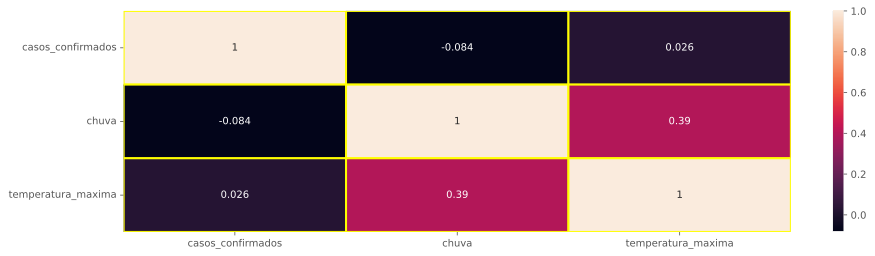

In [16]:
data = df.drop(columns=['temperatura_minima','temperatura_media']).corr()
plt.figure(figsize=(15,4))
sns.heatmap(data, annot=True,linewidths=2, linecolor='yellow')
plt.yticks(rotation=0)

In [17]:
df["data"] = pd.to_datetime(df["data"], format="%Y-%m-%d")
df["ano"] = pd.DatetimeIndex(df['data']).year
df["mes"] = pd.DatetimeIndex(df['data']).month
df

,data,casos_confirmados,chuva,temperatura_media,temperatura_minima,temperatura_maxima,ano,mes
0,1998-01-01,237,179.2,25.7,20.2,28.1,1998,1
1,1998-02-01,331,226.3,25.1,20.0,28.0,1998,2
2,1998-03-01,562,149.1,24.8,22.4,27.2,1998,3
3,1998-04-01,187,46.4,22.7,18.1,26.0,1998,4
4,1998-05-01,32,88.3,19.2,15.7,22.9,1998,5
...,...,...,...,...,...,...,...,...
199,2014-08-01,55,12.2,20.6,13.1,24.7,2014,8
200,2014-09-01,40,69.2,23.0,18.6,26.8,2014,9
201,2014-10-01,40,15.6,24.7,17.2,30.0,2014,10
202,2014-11-01,57,154.8,25.0,22.1,28.3,2014,11


In [18]:
df_anual = df.groupby('ano')['casos_confirmados'].agg('sum')

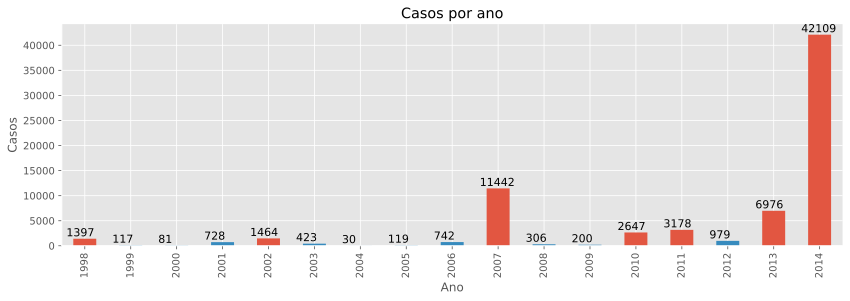

In [19]:
clrs = ['#E25641' if (i > 1000) else '#378bbe' for i in df_anual.to_list() ]
fig_bar = df_anual.plot(kind='bar',title = 'Casos por ano',figsize=(14,4),color = clrs)
fig_bar.set_xlabel('Ano')
fig_bar.set_ylabel('Casos')
for (i, v), val in zip(enumerate(df_anual),df_anual):
    fig_bar.text(i-.4, val + 500, val, color='black', fontsize=11)
            
fig_bar.spines['right'].set_visible(False)
fig_bar.spines['top'].set_visible(False) 

In [20]:
df = df.groupby(['ano','mes'], as_index=False).agg('sum')

C:\Users\dev\AppData\Local\Temp\ipykernel_5472\1363040512.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['ano','mes'], as_index=False).agg('sum')


In [21]:
tab_cruz = pd.crosstab(df['ano'],df['mes'],df['casos_confirmados'],aggfunc='sum')
tab_cruz

mes,1,2,3,4,5,6,7,8,9,10,11,12
ano,,,,,,,,,,,,
1998,237,331,562,187,32,11,6,4,7,7,5,8
1999,7,12,27,49,8,3,1,3,3,0,0,4
2000,6,11,21,15,8,4,4,3,0,2,2,5
2001,32,38,160,223,136,21,13,10,2,2,5,86
2002,224,364,348,266,156,50,8,9,6,4,7,22
2003,90,91,125,76,28,7,2,0,0,1,0,3
2004,9,8,6,3,1,0,0,0,0,0,0,3
2005,5,7,8,38,29,17,8,2,2,0,0,3
2006,8,24,187,292,129,31,7,16,10,17,10,11


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, '1998'),
  Text(0, 1.5, '1999'),
  Text(0, 2.5, '2000'),
  Text(0, 3.5, '2001'),
  Text(0, 4.5, '2002'),
  Text(0, 5.5, '2003'),
  Text(0, 6.5, '2004'),
  Text(0, 7.5, '2005'),
  Text(0, 8.5, '2006'),
  Text(0, 9.5, '2007'),
  Text(0, 10.5, '2008'),
  Text(0, 11.5, '2009'),
  Text(0, 12.5, '2010'),
  Text(0, 13.5, '2011'),
  Text(0, 14.5, '2012'),
  Text(0, 15.5, '2013'),
  Text(0, 16.5, '2014')])

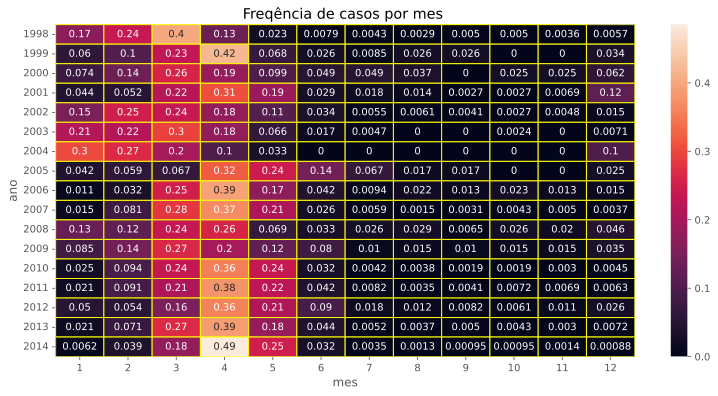

In [22]:
plt.figure(figsize=(13,6))
sns.heatmap((tab_cruz.div(tab_cruz.sum(axis=1), axis=0)), annot=True,linewidths=1, linecolor='yellow')
plt.title('Freqência de casos por mes ')
plt.yticks(rotation=0)